In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from statsmodels.formula.api import ols as myols #ordinary least squ

data=pd.read_csv('.\datasets\Mult_Reg_Yield.csv')
data.head()

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


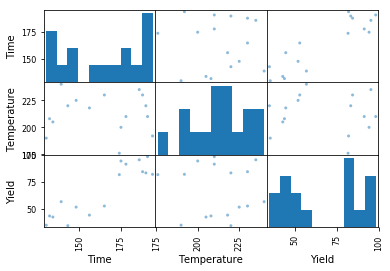

In [2]:
tmp = data.Temperature
time=data.Time
yld = data.Yield

scatter_matrix(data)
plt.show()

In [3]:
np.corrcoef(tmp,yld)

array([[ 1.        , -0.05456951],
       [-0.05456951,  1.        ]])

In [4]:
np.corrcoef(time,tmp)

array([[ 1.        , -0.00756007],
       [-0.00756007,  1.        ]])

In [5]:
np.corrcoef(time,yld)

array([[ 1.        ,  0.89671196],
       [ 0.89671196,  1.        ]])

In [7]:
myModel = myols("yld ~ time + tmp",data)
myModel = myModel.fit()
myModel.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yld   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.32e-05
Time:                        09:10:32   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
tmp           -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
myModel = myols("yld ~ time", data).fit()
myModel.summary()


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yld   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     57.46
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.55e-06
Time:                        09:14:18   Log-Likelihood:                -59.797
No. Observations:                  16   AIC:                             123.6
Df Residuals:                      14   BIC:                             125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6205     19.791     -4.124      0.001    -124.067     -39.174
time           0.9065      0.120      7.580      0.000       0.650       1.163
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.969
Skew:                          -0.127   Prob(JB):                        0.616
Kurtosis:                       1.822   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
pred = myModel.predict()
res = yld - pred
res

0     -1.218472
1      5.597558
2      2.655712
3      6.787842
4    -15.244357
5    -12.231519
6    -13.502372
7      8.420112
8     12.323443
9     -4.392796
10    17.291104
11   -15.486272
12    -7.305704
13    11.671743
14     5.468620
15    -0.834642
Name: Yield, dtype: float64

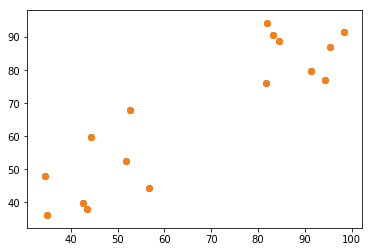

In [12]:
plt.scatter(yld,pred)
plt.show()

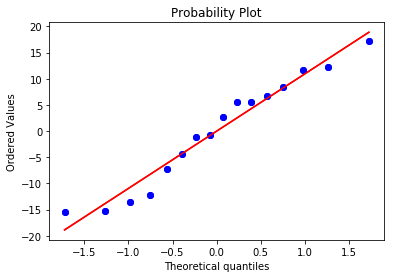

In [14]:
st.probplot(res,plot=plt)
plt.show()

In [15]:
st.normaltest(res)

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.8944805759902918, pvalue=0.38780979136720556)

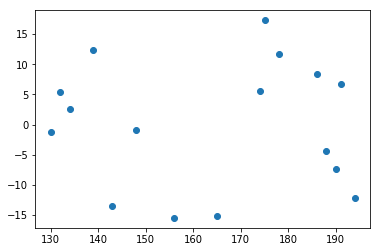

In [16]:
plt.scatter(time,res)
plt.show()

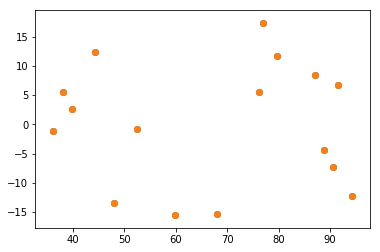

In [18]:
plt.scatter(pred,res)
plt.show()